In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [7]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [8]:
X_train,y_train=train['features'],train['labels']
X_validation,y_validation=valid['features'],valid['labels']
X_test,y_test=test['features'],test['labels']

In [35]:
X_train.shape

(34799, 32, 32, 3)

In [37]:
X_test.shape

(12630, 32, 32, 3)

13

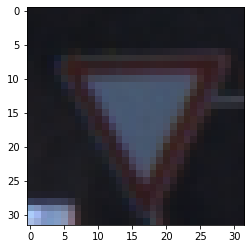

In [38]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

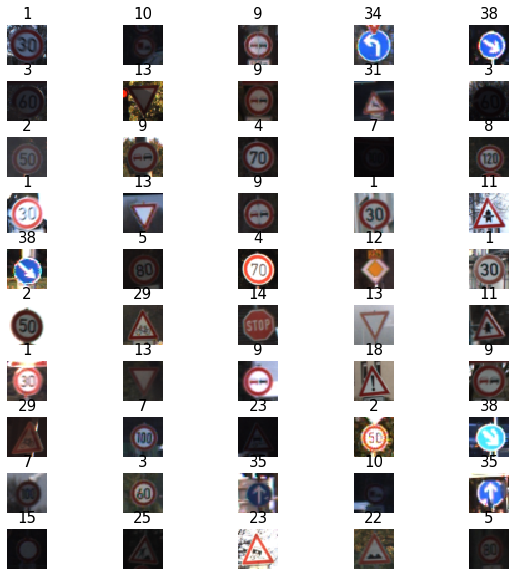

In [39]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)


    # Select a random number
    
    # read and display an image with the selected index    
    

        

In [40]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [41]:
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)
X_validation_gray=np.sum(X_validation/3,axis=3,keepdims=True)
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)

In [42]:
X_train_gray.shape

(34799, 32, 32, 1)

In [43]:
X_train_gray_norm=(X_train_gray-128)/128
X_validation_gray_norm=(X_validation_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128

In [44]:
X_validation_gray_norm    #we dont want to feed the data with 100 to 150 pixels so it is normalised
#data is easy to feed and marginal in size of pixels

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


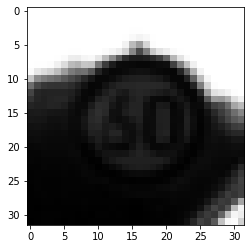

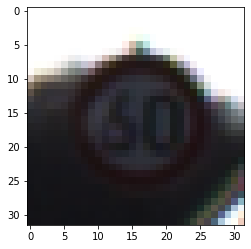

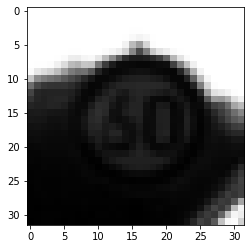

In [45]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [46]:
from tensorflow.keras import datasets, layers, models
#CNN is densely connected neural network The neurons in each layer are densely packed

CNN=models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5),activation='relu'))
CNN.add(layers.AveragePooling2D())


CNN.add(layers.Flatten())
CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))


In [47]:
CNN.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
history=CNN.fit(X_train_gray_norm,y_train,batch_size=500,epochs=10,verbose=1,validation_data=(X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 50s 1ms/sample - loss: 3.1811 - accuracy: 0.1762 - val_loss: 2.7154 - val_accuracy: 0.3161
Epoch 2/10
34799/34799 [==============================] - 36s 1ms/sample - loss: 1.8604 - accuracy: 0.4827 - val_loss: 1.4200 - val_accuracy: 0.6073
Epoch 3/10
34799/34799 [==============================] - 27s 763us/sample - loss: 1.1368 - accuracy: 0.6698 - val_loss: 1.0233 - val_accuracy: 0.7063
Epoch 4/10
34799/34799 [==============================] - 30s 852us/sample - loss: 0.8356 - accuracy: 0.7556 - val_loss: 0.8008 - val_accuracy: 0.7660
Epoch 5/10
34799/34799 [==============================] - 29s 822us/sample - loss: 0.6928 - accuracy: 0.7996 - val_loss: 0.7307 - val_accuracy: 0.7769
Epoch 6/10
34799/34799 [==============================] - 29s 826us/sample - loss: 0.5843 - accuracy: 0.8316 - val_loss: 0.6641 - val_accuracy: 0.8063
Epoch 7/10
34799/34799 [=========================

In [49]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.8419635891914368


In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

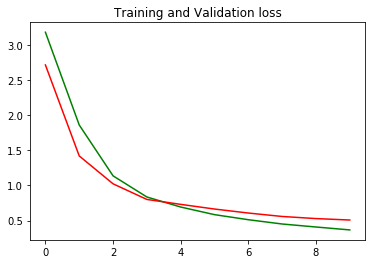

In [52]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'g',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation Loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

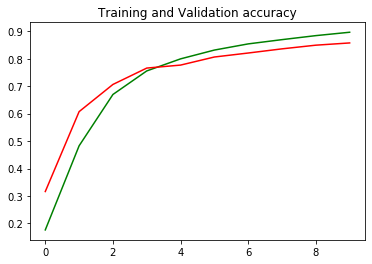

In [53]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'g',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label='validation Accuracy')
plt.title('Training and Validation accuracy')

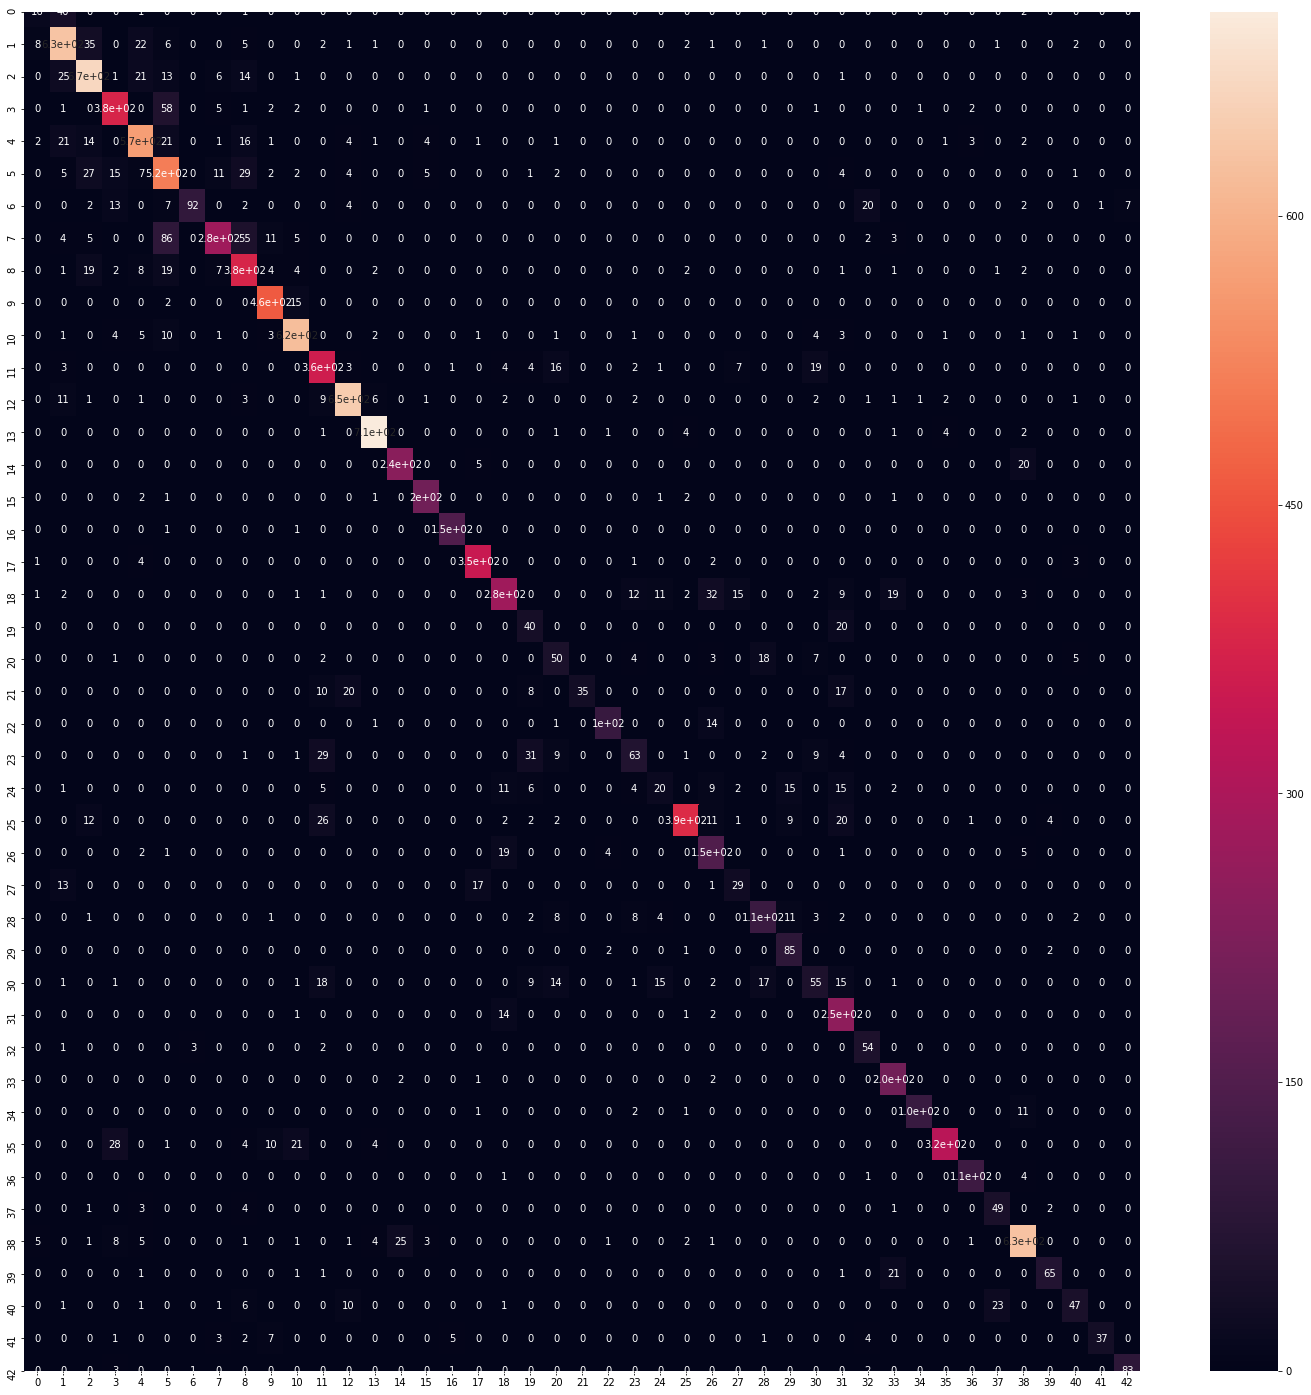

In [55]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

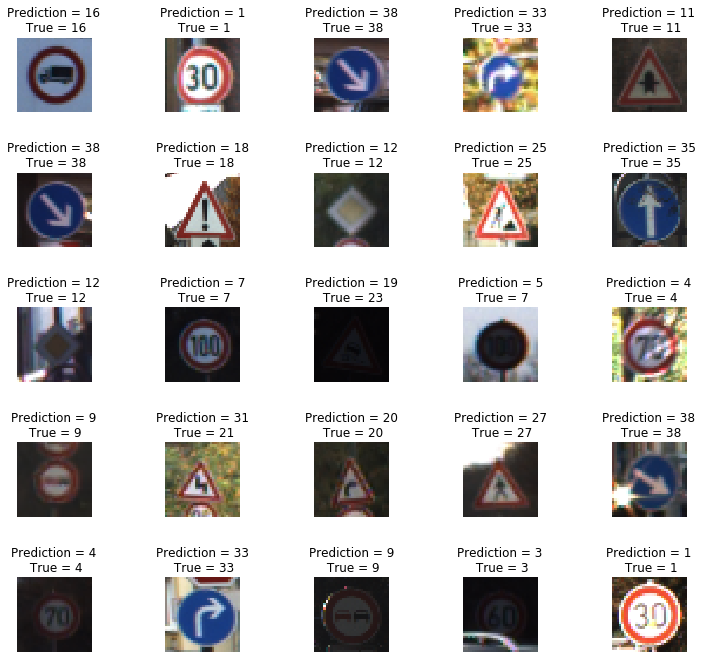

In [56]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    